# Homework 5
Code Author: Chinmay Upadhye
Dataset used: Default dataset (problem 2), Hitters dataset (problem 3)

## Problem 2
Checking the test errors for 3 different split using Logistc regression

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import scale
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Default.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.7+ KB


In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
df['default'] = df.default.factorize()[0]

In [5]:
estBI= smf.ols('default ~ balance + income', df).fit()
estBI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     705.8
Date:                Mon, 14 May 2018   Prob (F-statistic):          1.91e-287
Time:                        22:25:16   Log-Likelihood:                 3651.3
No. Observations:               10000   AIC:                            -7297.
Df Residuals:                    9997   BIC:                            -7275.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0922      0.006    -15.936      0.000      -0.104      -0.081
balance        0.0001   3.51e-06     37.511      0.000       0.000       0.000
income      4.605e-07   1.27e-07      3.613      0.000    2.11e-07     7.1e-07
==============================================================================
Omnibus:                     8534.546   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179819.904
Skew:                           4.234   Prob(JB):                         0.00
Kurtosis:                      21.970   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
df1 = df[["balance", "income"]] 

In [7]:
columns = ['balance','income']
df2 = pd.DataFrame(df,columns = columns)

columns = ['default']
y = pd.DataFrame(df,columns = columns)

In [8]:
# First split

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


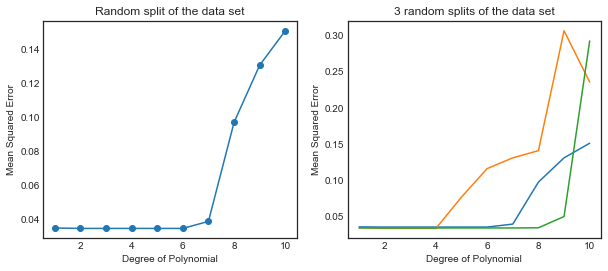

In [9]:
t_prop = 0.8
p_order = np.arange(1,11)
r_state = np.arange(0,3)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LogisticRegression()

# Generate 3 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df2)
    #X_poly = df2
    
    #X_poly = sm.add_constant(X_poly)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('3 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
   

In [10]:
# k-fold CV
folds = 5
elements = len(df2.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LogisticRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df2)
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df.default, cv=kf_10, scoring='neg_mean_squared_error').mean()    


In [11]:
# LeaveOneOut CV

loo = LeaveOneOut()
loo.get_n_splits(df2)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df2)
    score = cross_val_score(regr, X_poly, df.default, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)



KeyboardInterrupt: 

In [ ]:


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('3-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')

    ax.set_xlabel('Degree of Polynomial')
   

In [ ]:
## Second split

In [ ]:
t_prop = 0.7
p_order = np.arange(1,11)
r_state = np.arange(0,3)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LogisticRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df2)
    #X_poly = df2
    
    #X_poly = sm.add_constant(X_poly)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('3 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
   

In [ ]:
# k-fold CV
folds = 5
elements = len(df2.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LogisticRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df2)
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df.default, cv=kf_10, scoring='neg_mean_squared_error').mean()    


In [ ]:
# LeaveOneOut CV

loo = LeaveOneOut()
loo.get_n_splits(df2)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df2)
    score = cross_val_score(regr, X_poly, df.default, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [ ]:

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('3-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')

    ax.set_xlabel('Degree of Polynomial')
   

In [ ]:
# Third split

In [ ]:
t_prop = 0.7
p_order = np.arange(1,11)
r_state = np.arange(0,3)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LogisticRegression()


for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df2)
    #X_poly = df2
    
    #X_poly = sm.add_constant(X_poly)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('3 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
   